<a href="https://colab.research.google.com/github/lcalderon-aceituno/PS353-SP22-HW/blob/main/HW13_Advanced_Dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12.12

## part a

If the gamma vaules do converge at some critical $\gamma_c$, then the limit as $n -> ∞$ of equation 12.17 must be 0.

$$\lim_{n\to\infty} \gamma_{n+1} - \gamma_n = 0 = \lim_{n\to\infty}\frac{1}{δ^{n-1}} \gamma_n - \gamma_{n-1}$$

Ultimately, $\lim_{n\to\infty} \gamma_{n+1} = \gamma_c$ and $\gamma_n - \gamma_{n-1} = K$ where $K$ is some constant so 
$$\gamma_{c} = \frac{K}{δ^n} + \gamma_n$$

or 

$$\gamma_{n} = -\frac{K}{δ^n} + \gamma_c$$

so the relationship between $\delta^{-n}$ and $\gamma_n$ must be linear and the intercept is $\gamma_c$.


## part b

In [1]:
#@title Import dependencies 
from sympy import *
from sympy.plotting import plot
from sympy import symbols
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#@title Install Whitworth libraries
!pip install whit-phys-util
import whit_phys_util as buc

     |████████████████████████████████| 10.9 MB 3.9 MB/s 
Mounted at /content/drive


In [3]:
df = [[1.0663,0], [1.0793, 0.0130], [1.0821,0.0130+0.0028], [1.0827,0.0130+0.0028+0.0006]]

In [4]:
df = pd.DataFrame(df, columns = ['gamma', 'interval'])
df

,gamma,interval
0,1.0663,0.0000
1,1.0793,0.0130
2,1.0821,0.0158
3,1.0827,0.0164


In [5]:
d = 4.6692016
df['delta'] = [1/d,1/d**2,1/d**3,1/d**4]
df

,gamma,interval,delta
0,1.0663,0.0000,0.214169
1,1.0793,0.0130,0.045869
2,1.0821,0.0158,0.009824
3,1.0827,0.0164,0.002104


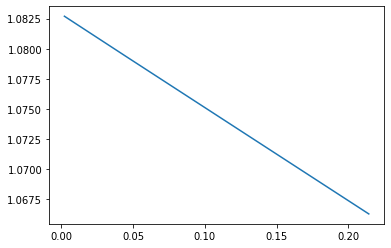

In [6]:
plt.plot(df['delta'], df['gamma']);

In [7]:
fitTable, fitFunc = buc.prettyPolyFit(df['delta'], df['gamma'])
fitTable

,slope,intercept
value,-0.077317,1.082857
uncertainty,0.000102,0.000011


This value of $\gamma_c = 1.082857$ agrees exactly with the textbook's result of $\gamma_c = 1.0829$.

# 12.14

In [8]:
gamma = 1.084
w = 2*pi
w0 = 1.5*w
beta = w0/4
init = [0,0] # initial conditions

In [9]:
# r = phi dot
def drdt(t, r):
  phi= r[0]
  phidot = r[1]
  return [phidot, -2*beta*phidot-w0**2*sin(phi)+gamma*w0**2*cos(w*t)]

In [10]:
tspan = [0, 7]

In [11]:
sol = solve_ivp(drdt, tspan, init, dense_output=True, rtol = 1e-12)

In [12]:
t = np.linspace(0, 7, 10000) # grab 100 time points 
r = sol.sol(t)
phi1 = r[0]

In [13]:
init2 = [0.00001,0] # initial conditions

In [14]:
sol2 = solve_ivp(drdt, tspan, init2, dense_output=True, rtol = 1e-12)
r = sol2.sol(t)
phi2 = r[0]

The plot below showes the behavior over time of the same system with the different initial conditions. They can be seen to diverge shortly after $t = 6$.

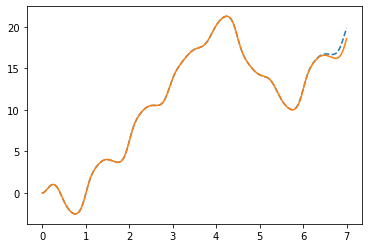

In [15]:
plt.plot(t, phi1,'--', t, phi2);

The plot below confirms that the drive strength $\gamma$ produces chaotic motion because the difference between the two trajectories increases with time. 

In [16]:
deltaphi = phi2 - phi1

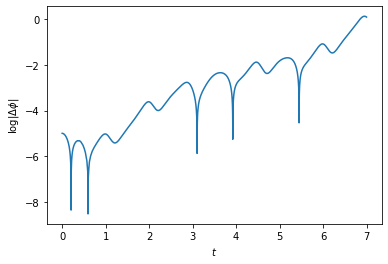

In [17]:
y = np.log10(abs(deltaphi));
plt.plot(t, y);
plt.ylabel('$\log|\Delta\phi|$');
plt.xlabel('$t$');

# 12.16

## part a

We know $\Delta\phi = Ke^{λt}$ so $t = \ln(\Delta \phi)$, where in our case $\Delta \phi$ can be calculated as resolution/accuracy

In [24]:
resolution = 1/100
acc1 = 10**-6

In [29]:
time1 = ln(resolution/acc1)
time1

9.21034037197618

so time horizon 1 is $9.21$ seconds

## part b

In [31]:
acc2 = 10**-9

In [32]:
time2 = ln(resolution/acc2)
time2

16.1180956509583

so time horizon 1 is $16.12$ seconds